In [ ]:
# !pip install onedrivesdk


In [2]:
# !curl https://rclone.org/install.sh | sudo bash
# !rclone config

# # Once configured, mount OneDrive
# !rclone --vfs-cache-mode writes mount onedrive: /content/onedrive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import the necesseries libraries

In [3]:
import pandas as pd
import librosa
import os
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


# Load or bring up the dataset

In [5]:
# Load the Excel dataset
df = pd.read_excel('/content/drive/MyDrive/music/AI Music Files Metadata 10k(1).xlsx')

# Path to the folder containing audio files
audio_folder = '/content/drive/MyDrive/Music Classification/All Music Files'

df.head()


,Name,Song,Artist,Popularity,Album,Album Date,Time,BPM,Genre,Sub Genre,...,Time Signature,Album Label,Camelot,AM Genre,AM Sub Genre,AM Category,Tempo,Vocal Type,File Name,Unnamed: 29
0,(G)I-DLE - I Want That,I Want That,(G)I-DLE,62,HEAT,2023-10-05 00:00:00,02:51:00,120,Pop,k-pop girl group,...,4,CUBE ENTERTAINMENT INC./88rising Music,5A,Korean/Pop,0,2023 Hits,Mid Up,Vocal - Female,(G)I-DLE - I Want That.m4a,(G)I-DLE - I Want That
1,(G)I-DLE - Nxde,Nxde,(G)I-DLE,74,I love,2022-10-17 00:00:00,02:58:00,136,Pop,k-pop girl group,...,4,Cube Entertainment,9A,World/Pop,0,2022 Hits,Mid,Vocal - Female,(G)I-DLE - Nxde.m4a,(G)I-DLE - Nxde
2,(G)I-DLE - TOMBOY,TOMBOY,(G)I-DLE,75,I NEVER DIE,2022-03-14 00:00:00,02:54:00,124,Pop,k-pop girl group,...,4,Cube Entertainment,12A,Korean/Pop,0,K-Pop,Mid Up,Vocal - Female,(G)I-DLE - TOMBOY.mp3,(G)I-DLE - TOMBOY
3,[ocean jams] - Bummer,Bummer,[ocean jams],24,Horizons,2019-06-28 00:00:00,02:39:00,80,Electronic,lo-fi beats,...,4,Epidemic Sound,7A,Electronic,Lo-Fi,Lo-Fi,Mid,Instrumental,[ocean jams] - Bummer.mp3,[ocean jams] - Bummer
4,101 Strings Orchestra - A Bed For Two,A Bed for Two,101 Strings Orchestra,1,The Soul of Greece (Remastered from the Origin...,1966-01-01 00:00:00,03:08:00,117,Easy listening,easy listening,...,4,Alshire,7B,World/Italy,Traditional,Traditional Italian,Mid,Instrumental,101 Strings Orchestra - A Bed For Two.M4a,101 Strings Orchestra - A Bed For Two


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10803 entries, 0 to 10802
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            10803 non-null  object
 1   Song            10803 non-null  object
 2   Artist          10803 non-null  object
 3   Popularity      10803 non-null  int64 
 4   Album           10797 non-null  object
 5   Album Date      10803 non-null  object
 6   Time            10803 non-null  object
 7   BPM             10803 non-null  int64 
 8   Genre           8916 non-null   object
 9   Sub Genre       8992 non-null   object
 10  Dance           10803 non-null  object
 11  Energy          10803 non-null  int64 
 12  Acoustic        10803 non-null  int64 
 13  Instrumental    10803 non-null  int64 
 14  Happy           10803 non-null  int64 
 15  Speech          10803 non-null  int64 
 16  Live            10803 non-null  int64 
 17  Loud            10803 non-null  int64 
 18  Key   

In [7]:
df.isnull().sum()

,0
Name,0
Song,0
Artist,0
Popularity,0
Album,6
Album Date,0
Time,0
BPM,0
Genre,1887
Sub Genre,1811


In [8]:
df.drop(['Unnamed: 29'], axis=1, inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

,0
Name,0
Song,0
Artist,0
Popularity,0
Album,0
Album Date,0
Time,0
BPM,0
Genre,0
Sub Genre,0


In [11]:
df

,Name,Song,Artist,Popularity,Album,Album Date,Time,BPM,Genre,Sub Genre,...,Language,Time Signature,Album Label,Camelot,AM Genre,AM Sub Genre,AM Category,Tempo,Vocal Type,File Name
0,(G)I-DLE - I Want That,I Want That,(G)I-DLE,62,HEAT,2023-10-05 00:00:00,02:51:00,120,Pop,k-pop girl group,...,English,4,CUBE ENTERTAINMENT INC./88rising Music,5A,Korean/Pop,0,2023 Hits,Mid Up,Vocal - Female,(G)I-DLE - I Want That.m4a
1,(G)I-DLE - Nxde,Nxde,(G)I-DLE,74,I love,2022-10-17 00:00:00,02:58:00,136,Pop,k-pop girl group,...,Korean/English,4,Cube Entertainment,9A,World/Pop,0,2022 Hits,Mid,Vocal - Female,(G)I-DLE - Nxde.m4a
2,(G)I-DLE - TOMBOY,TOMBOY,(G)I-DLE,75,I NEVER DIE,2022-03-14 00:00:00,02:54:00,124,Pop,k-pop girl group,...,Korean,4,Cube Entertainment,12A,Korean/Pop,0,K-Pop,Mid Up,Vocal - Female,(G)I-DLE - TOMBOY.mp3
19,10cc - The Things We Do For Love,The Things We Do For Love,10cc,66,Deceptive Bends,1977-00-00,03:27:00,107,Rock,"album rock, art rock, classic rock, glam rock,...",...,English,4,EMI,3B,Rock,Progressive Pop,Classic Rock,Mid,Vocal - Male,10cc - The Things We Do For Love.M4a
23,112 - Peaches & Cream,Peaches & Cream,112,64,Part III,2001-00-00,03:13:00,204,undefined,"atl hip hop, boy band, contemporary r&b, hip p...",...,English,4,Rhino Atlantic,9A,R&B,0,Hip Hop,Mid Up,Vocal - Male,112 - Peaches & Cream.Mp3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10798,Zubeen Garg - Oh My God,Oh My God,Zubeen Garg,20,Oh My God,2012-08-24 00:00:00,01:28:00,138,Pop,assamese pop,...,0,4,T-Series,1B,Soundtrack/Bollywood,Bhajan,0,Mid,Vocal,Zubeen Garg - Oh My God.mp3
10799,Zuco 103 - Q Baiano,Q Baiano,Zuco 103,37,"One Down, One Up",2003-10-20 00:00:00,02:47:00,114,"Jazz, Latin","electro jazz, sambass",...,English,4,Zuco Sound,2A,Nu Jazz,0,Nu Jazz,Mid Up,Vocal - Female,Zuco 103 - Q Baiano.Mp3
10800,ZZ Top - I Thank You,I Thank You,ZZ Top,43,Deguello,1979-11-01 00:00:00,03:24:00,110,Rock,"album rock, blues rock, classic rock, hard roc...",...,English,4,BMG Rights Management (US) LLC,9B,Blues Rock,Texas Blues,Classic Rock,Mid,Vocal - Male,ZZ Top - I Thank You.m4a
10801,ZZ Top - She Loves My Automobile,She Loves My Automobile,ZZ Top,36,Deguello,1979-11-01 00:00:00,02:23:00,130,Rock,"album rock, blues rock, classic rock, hard roc...",...,English,3,BMG Rights Management (US) LLC,10B,Blues Rock,Texas Blues,Classic Rock,Mid Up,Vocal - Male,ZZ Top - She Loves My Automobile.m4a


# Extract the music audio features

In [13]:

# Feature extraction function
def extract_features(audio_path):
    try:
        y, sr = librosa.load(audio_path, duration=30)
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
        chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
        mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
        return mfccs, chroma, mel
    except FileNotFoundError:
        print(f"File not found: {audio_path}")
        return None, None, None

In [14]:
# Extract features from each audio file
df['features'] = df['File Name'].apply(lambda x: extract_features(os.path.join(audio_folder, x)))

# Split the features into separate columns and drop rows with missing features
df['mfcc'] = df['features'].apply(lambda x: x[0] if x is not None else None)
df['chroma'] = df['features'].apply(lambda x: x[1] if x is not None else None)
df['mel'] = df['features'].apply(lambda x: x[2] if x is not None else None)
df = df.dropna(subset=['mfcc', 'chroma', 'mel'])
df = df.drop(columns=['features'])

<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/48th St. Collective - Just Like Heaven.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/48th St. Collective - Just Like Heaven.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/A R I Z O N A - Problems.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/A R I Z O N A - Problems.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/A.R. Rahman - Whistlu Whistlu Whistluma.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Aakanksha Sharma - Raat Ke Saaye Tale.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Abhijeet Srivastava - Happy Birthday.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ajay Warriar - Akashadalli.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ajay Warriar - Nanna Hetthavalu.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ali Azmat - Main To Yahin Hoon Lekin.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ali Noor - Girha.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Amazonics - I Wanna Be Your Boyfriend.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Amazonics - I Wanna Be Your Boyfriend.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Amit Kumar - Balle Balle.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Amit Trivedi - Beautiful.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Amit Trivedi - Tommy Gun.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ammy Virk - Pasand Jatt Di.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Amrit Maan - Blood Wich Tu.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anakelly - Under My Thumb.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anakelly - Under My Thumb.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anirudh Ravichander - Sachin Tendulkar Back Bencher.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anirudh Ravichander - Sanchari.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ann Peebles - I Can’T Stand The Rain.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anuradha Bhat - Hoge Jana Mari.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anuradha Bhat - Krishna Nee.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anuradha Bhat - Mareyalagadha Mechidha.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anuradha Bhat - Preethi Nee Nanna.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anuradha Bhat - Preethi Soluthide.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Anushka Manchanda - Meri Aadat Mera Hissa.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Aparna Nandan - Nuvvu Levanna.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Arijit Singh - Binte Dil.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Arijit Singh - Chota Sa Fasana.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Armaan Malik - Jab Tak.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Armaan Malik - Shukar Manavaan.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Armaan Malik - Uff Yeh Noor.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Armaan Malik - Waqt Ke Jungle.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Asees Kaur - Hui Malang.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Asura - Idi Varanasi.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Atif Aslam - Chalte Chalte.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ayushmann Khurrana - Maafi.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Banda Do Sul - Evacuate The Dancefloor.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Banda Do Sul - Evacuate The Dancefloor.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bappi Lahiri - Dharpakad.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Barbara Mendes - Call Me.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Barbara Mendes - Call Me.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Beenie Man & Fambo - I'm Drinking-rum & Red Bull.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bellestar - Love Will Tear Us Apart.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bellestar - Love Will Tear Us Apart.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bellestar - Paranoid.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bellestar - Paranoid.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Benny Dayal - Comosava Paris.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bhoomi Trivedi - Bahne Dey.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Billie Holiday - Am I Blue (2).m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Billie Holiday - Hello, My Darling (1).m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Blaaze - Prema Thokka Tholu.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bo Diddley - Who Do You Love.M4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bo Diddley - Who Do You Love.M4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bob Marley & The Wailers - No Symphaty.m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bob Marley & the Wailers - Stir It Up [Live Version].m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bob Marley & the Wailers - Top Rankin'.m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bobo Shashi - Ye Mantramo.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Bombay Jayashri - Thatra Gandhavathi Pruthvi.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Brinda - Naa Kale Kalai.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Cassandra Beck - Material Girl.M4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Cassandra Beck - Material Girl.M4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chandan Shetty - Banda Banda Babru.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chandan Shetty - Maga Baaro.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chetan Sosca - Gutagi Kelli.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chethan Naik - E Erabaradhe.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chethan Naik - Maaya Kannadi.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chinmayi - Yenti Yenti.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chinna Ponnu - Mirchi.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chorus - Dharmapraja.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chorus - Nathathra.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chorus - Shankara Vijayam.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chorus - Veda Thandavam.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Chorus - Yama Slokam.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Coleman Hell - Fireproof.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Coleman Hell - Fireproof.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dilpreet Dhillon - Morni.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dinah Washington - Invitation (1).m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dinker Kalvala - Dawath.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dinker Kalvala - Vethiki Vethiki.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Divya Kumar - Kahani Baaki Hai.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Divya Kumar - Moorakh.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Divya Kumar - Soni Kudi.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Divya Kumar - Soni Kudi.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/DJ Style - Clocks.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/DJ Style - Clocks.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dual Sessions - Radioactive.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dual Sessions - Radioactive.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dualbox - Is This Love.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dualbox - Is This Love.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dualbox - Miracle Man.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Dualbox - Miracle Man.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Edu Lobo - Viola Fora De Moda (1).M4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ella Fitzgerald - I Concentrate On You (1).m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Elza Soares - Mas Que Nada (1).M4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Eve St. Jones - Blackbird.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Eve St. Jones - Blackbird.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Eve St. Jones - Blame It On The Boogie.M4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Eve St. Jones - Blame It On The Boogie.M4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Francoise Sanders - I Will.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Francoise Sanders - I Will.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Francoise Sanders - In Between Days.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Francoise Sanders - In Between Days.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Future Soundscapes - Roxanne.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Future Soundscapes - Roxanne.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/General Soundbwoy - Hello.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/General Soundbwoy - Hello.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Gippy Grewal - Fuel.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Gippy Grewal - Phulkari.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Gopi Sundar - Kanureppala Kaalam.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Gurnam Bhullar - Lanedarniye.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Guru Randhawa - Outfit.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Haricharan - Chandamama.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Haricharan - Ee Mussanje.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Haricharan - Mullapoove.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Haricharan - Punnami Vennelake.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Haricharan - Vekuvala.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Hariharan - Sapdha Gunakam.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Hariharan - Sivoham.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Harish Raghavendra - Idhi Rana Rangama.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Harrdy Sandhu - Little Little.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Harshdeep Kaur - Yaadien Gatthri Mein.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Hiphop Tamizha - Paisa Note.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Hymath Mohammed - O Lakshyam.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Hypnomusic - Maggie May.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Hypnomusic - Maggie May.m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Icona Pop - Feels In My Body.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Icona Pop - Feels In My Body.m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ilaiyaraaja - Kalushitham.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jamie Lancaster - It Ain't Over 'Til It's Over.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jamie Lancaster - It Ain't Over 'Til It's Over.m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jassie Gift - Anaganaga.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jingo - Lucky Star.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jingo - Lucky Star.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Joi Barua - Dusokute.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Joji - Your Man.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Joji - Your Man.m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jonita Gandhi - Woh Tho Yahin Hai Lekin.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jordan Sandhu - Black Pagg.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jordan Sandhu - Shaukeen Jatt.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jordan Sandhu - Shaukeen Jatt.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jubin Nautiyal - Tinka.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Justin Prabhakaran - Sei Un Angelo.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Jyotica Tangri - Mujhe Ishq Sikha Karke.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kailash Kher - Chinnamma Kalyanam.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kailash Kher - Gange Jayamu.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kailash Kher - Jal Rahin Hain.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kailash Kher - Nee Choopula.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kailash Kher - Onduralli Obba Yajamana.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kailash Kher - Silaka Silaka.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kailash Kher - Tum Miley Ho.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kalpana - Thillana.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Kamal Khan - Rab Ne Milaya.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karan Sehmbi - Photo.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karthik - Kallalo Vunna Prema.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karthik - Minsarey Minsarey.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karthik - Oru Thooval.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karthik - Po Pove.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karthik - Rab Di.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karthik - Sivam.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karthik - Tara.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Karthik Rodriguez - Kannu Kotti.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Lee Avril - Synchronicity.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Lee Avril - Synchronicity.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Leon James - Ninna Monnalaage.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Luca Schreiner - Over You.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Luca Schreiner - Over You.m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Lucky Ali - Ya Husain.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Malavika - Sri Krishnaraya.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Manan Bhardwaj - Nichod Dunga.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Manasa Holla - Hogadiru Hogadiru.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mandy Jones - Paperback Writer.M4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mandy Jones - Paperback Writer.M4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Manikka Vinayagam - Minchula Saagide.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Manisha Eerabathini - Lokamantha Okkasari Maare.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Manisha Eerabathini - Nee Romba Romba.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Manisha Eerabathini - Telipo Telipo.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mannat Noor - Multan.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mannat Noor - Sheesha.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mano - Odalu Mannanta.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Marianna Leporace - Bizarre Love Triangle.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Marianna Leporace - Bizarre Love Triangle.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Marianna Leporace - If.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Marianna Leporace - If.m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mellow D - Bhasad.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mika Singh - Sexy Baliye.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mohana Bhogaraju - Cheyy Joggingu Jumpingu.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mohana Bhogaraju - Neeti Neeti Sukka.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mohana Bhogaraju - Yetikokka Poota.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Mukesh - Appikondu Nange Jo Laali.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Nakul Abhyankar - Neenallave.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Narayan Sharma - Kalabeda Kolabeda.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Narayan Sharma - Yanda Yendati.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Naveen Madhav - Thees Maar Khan.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Neeti Mohan - Naam Hai Mera.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Neha Kakkar - Gali Gali.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Nikhita Gandhi - Pilla Picture Perfect.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Nikhita Gandhi - Tan Tan.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Niranj Suresh - Boggu Ganilo.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Os Digitalistas - Heavy.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Os Digitalistas - Heavy.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/P. Leela - Sri Janaki Devi.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/P. Leela - Yemito Ee Maya.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/P. Susheela - Ada Janmaku.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/P. Susheela - Baalanura Madanaa.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Papon - Heartquake.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Parampara Tandon - Padhai Likhai.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Patti Smith - Redondo Beach (1).m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Priyadarshini - Mora Vinara.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Raghu Dixit - Kaliyo Nee Kannada.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Raj Pandit - Lagan Lagi.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Rajesh Krishnan - Novina Butthina Kottu.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Rajesh Krishnan - Yaaru Illa.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ram Sampath - Itemwaale.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ranjit Bawa - Att Chukni.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ranjit Bawa - Bhangre Pain Ge.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Ranjit Bawa - End Yaariyaan.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Rita Lee - She Loves You.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Rita Lee - She Loves You.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Robert DeLong - First Person On Earth.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Robert DeLong - First Person On Earth.m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Roll Rida - Kaki Nemali Ke Votu.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Romy - Zumba.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Roshan Prince - Tan Ho Geya.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/S. Janaki - Devatalara.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/S. Janaki - Goranta Deepam.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/S. Janaki - Nee Dannai.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/S. P. Balasubrahmanyam - Loka Maya Bazaru.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/S. P. Balasubrahmanyam - Telipedelaga.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sachet Tandon - Nazarbattu.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sachin - Friendshippina Katheya Kelu.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Salman Ali - Jai He.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Samira Koppikar - Maati Ka Palang.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sanjith Hegde - Lambodara Loose Aadaa.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sanjith Hegde - Life Is Beautiful.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sanjith Hegde - London London.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sanjith Hegde - Lovve Illade.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sanjith Hegde - Neene Neene Neene Sangathi.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sanjith Hegde - Oh Vidhiye Kshamisu.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sanjith Hegde - Onde Ondhu Baari.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sanjith Hegde - Preetiyalli Hogo.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Santhosh

<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sarah Menescal - Lanterna Dos Afogados.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sarah Menescal - Lanterna Dos Afogados.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sarah Menescal - Used To Love Her.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sarah Menescal - Used To Love Her.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shaan - Murli Ki Taanon Si.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shaan - Take It Easy.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shaan - Veenavadini Symphony.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shail Hada - Ek Malaal.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shalmali Kholgade - Cham Cham.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shankar Mahadevan - Dheemtana.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shankar Mahadevan - Ichatey Ichatey.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shankar Mahadevan - Run Run.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shankar Mahadevan - Savarnadeergha Sandhi.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Shreya Ghoshal - Navilugari.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sid - Kiladi Police.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sid Sriram - Aagave Nuvvagave.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sid Sriram - Ayyayyayyo.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sid Sriram - Emo Emo.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sid Sriram - Nagumomu Thaarale.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sid Sriram - Nee Sigoovaregu.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sid Sriram - Undiporaadhey.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sidhu Moose Wala - So High (1).mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Silvio Cesar - Samba Do Carioca (1).M4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Skunk Tribecca - Strange Days.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Skunk Tribecca - Strange Days.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Slowcheeta - Kripya Dhyaan De.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sofi Tukker - Ringless.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sofi Tukker - Ringless.m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sonu Kakkar - Pawanla Phose.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sonu Nigam - Heer.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sonu Nigam - Jinka Asar Kab Se Hai.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sonu Nigam - Man Tu Shudi.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sonu Nigam - Mann Bawra.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sonu Nigam - Olumeyaa.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Srinivas - Baba Theme Music.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Srinivas - Seetha Kalyana.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Starley - Lovers + Strangers.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Starley - Lovers + Strangers.m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Stella Starlight Trio - Can't Feel My Face.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Stella Starlight Trio - Can't Feel My Face.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Stella Starlight Trio - Get The Party Started.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Stella Starlight Trio - Get The Party Started.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Stereo Dub - No Rain.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Stereo Dub - No Rain.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Steven Adams - Reppa Reppa.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Suchitra - Raja Na Raja.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sukhwinder Singh - Rabba.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sukhwinder Singh - Tumbe Te Zumba.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sunidhi Chauhan - Mohabbat.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sunidhi Chauhan - Oye Firangi.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Sunidhi Chauhan - Piya Aa.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Suraj Jagan - Lifebuoy.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Swarnalatha - Yamunna Thatilo.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tanishk Bagchi - Jugjugg Jeeyo.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tarsem Jassar - Disco.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tarsem Jassar - Kheen Khaab.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/The Cooltrane Quartet - Uptown Girl.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/The Cooltrane Quartet - Uptown Girl.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/The Everly Brothers - My Mammy (1).M4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/The Weeknd - Acquainted (1).Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tippu - Maatante Maatera.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tom Gregory - Rather Be You.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tom Gregory - Rather Be You.m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tones And I - Fly Away.m4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tones And I - Fly Away.m4a


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Tulsi Kumar - Tu Laung Main Elaachi.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Udit Narayan - Ishq Mein Bajti Hai Ghanti.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Urban Love - Sowing The Seeds Of Love.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Urban Love - Sowing The Seeds Of Love.Mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Urselle - Suicide Blonde.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Urselle - Suicide Blonde.Mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Urselle - Wake Me Up Before You Go-Go.M4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Urselle - Wake Me Up Before You Go-Go.M4a
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Uthara Unnikrishnan - Morrakka Mattrakkaa.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vasu Dixit - Brahmanu Bareda.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay - Vijay's Prediction.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay Prakash - Arare Shuruvayitu Hege.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay Prakash - Bargante.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay Prakash - Idhe Kadha Nee Katha.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay Prakash - Kanikaravirada Aatmada Karege.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay Prakash - Manasugalu.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay Prakash - Shankaane.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay Prakash - Shashwata.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Vijay Prakash - Twinkle Twinkle

<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Yasser Desai - Bandhu Tu Mera.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


File not found: /content/drive/MyDrive/Music Classification/All Music Files/Yo Yo Honey Singh - Thumka.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Yuvan Shankar Raja - Love All Day.mp3
File not found: /content/drive/MyDrive/Music Classification/All Music Files/Yuvan Shankar Raja - Sooriyadu Chandradu.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packa

File not found: /content/drive/MyDrive/Music Classification/All Music Files/Zubeen Garg - Oh My God.mp3


<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-13-31667edfdc97>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [15]:
df.head()

,Name,Song,Artist,Popularity,Album,Album Date,Time,BPM,Genre,Sub Genre,...,Camelot,AM Genre,AM Sub Genre,AM Category,Tempo,Vocal Type,File Name,mfcc,chroma,mel
0,(G)I-DLE - I Want That,I Want That,(G)I-DLE,62,HEAT,2023-10-05 00:00:00,02:51:00,120,Pop,k-pop girl group,...,5A,Korean/Pop,0,2023 Hits,Mid Up,Vocal - Female,(G)I-DLE - I Want That.m4a,"[-97.65399, 106.30948, 15.501858, 24.87504, 12...","[0.45128578, 0.4174696, 0.4470361, 0.47883895,...","[94.55233, 551.7951, 771.0112, 251.91183, 148...."
1,(G)I-DLE - Nxde,Nxde,(G)I-DLE,74,I love,2022-10-17 00:00:00,02:58:00,136,Pop,k-pop girl group,...,9A,World/Pop,0,2022 Hits,Mid,Vocal - Female,(G)I-DLE - Nxde.m4a,"[-75.88804, 78.95807, -11.606234, 4.7133307, -...","[0.3938531, 0.3376094, 0.39664754, 0.4174816, ...","[23.414337, 157.33607, 286.90588, 215.83316, 1..."
2,(G)I-DLE - TOMBOY,TOMBOY,(G)I-DLE,75,I NEVER DIE,2022-03-14 00:00:00,02:54:00,124,Pop,k-pop girl group,...,12A,Korean/Pop,0,K-Pop,Mid Up,Vocal - Female,(G)I-DLE - TOMBOY.mp3,"[-84.33897, 97.04735, 8.216179, 6.943708, 10.7...","[0.3031081, 0.38773894, 0.327495, 0.353252, 0....","[16.91848, 140.00739, 213.71082, 335.0241, 148..."
19,10cc - The Things We Do For Love,The Things We Do For Love,10cc,66,Deceptive Bends,1977-00-00,03:27:00,107,Rock,"album rock, art rock, classic rock, glam rock,...",...,3B,Rock,Progressive Pop,Classic Rock,Mid,Vocal - Male,10cc - The Things We Do For Love.M4a,"[-96.58887, 88.09623, -6.8476825, 13.040813, 6...","[0.24829343, 0.32273057, 0.3833206, 0.27005228...","[1.609649, 11.55763, 19.630026, 44.034767, 30...."
23,112 - Peaches & Cream,Peaches & Cream,112,64,Part III,2001-00-00,03:13:00,204,undefined,"atl hip hop, boy band, contemporary r&b, hip p...",...,9A,R&B,0,Hip Hop,Mid Up,Vocal - Male,112 - Peaches & Cream.Mp3,"[-146.76729, 43.431625, 6.478229, 16.123276, 1...","[0.43656695, 0.37266633, 0.4108396, 0.4187542,...","[194.95251, 415.26953, 308.1327, 322.54486, 11..."


In [16]:
# # Ensure uniform data types (convert all labels to int)
# df['BPM'] = df['BPM'].astype(int)
# df['Dance'] = df['Dance'].astype(int)
# df['Energy'] = df['Energy'].astype(int)
# df['Happy'] = df['Happy'].astype(int)
# df['Instrumental'] = df['Instrumental'].astype(int)



# Ensure features are numeric by converting them to arrays of floats
df['mfcc'] = df['mfcc'].apply(lambda x: np.array(x, dtype=float))
df['chroma'] = df['chroma'].apply(lambda x: np.array(x, dtype=float))
df['mel'] = df['mel'].apply(lambda x: np.array(x, dtype=float))

In [17]:
# Define a fixed length for all features (e.g., 100)
fixed_length = 100

# Pad or truncate the mfcc, chroma, and mel features
df['mfcc'] = df['mfcc'].apply(lambda x: np.pad(x, (0, max(0, fixed_length - len(x))), 'constant')[:fixed_length])
df['chroma'] = df['chroma'].apply(lambda x: np.pad(x, (0, max(0, fixed_length - len(x))), 'constant')[:fixed_length])
df['mel'] = df['mel'].apply(lambda x: np.pad(x, (0, max(0, fixed_length - len(x))), 'constant')[:fixed_length])

# Combine all features into a single array
# X = np.hstack([np.stack(df['mfcc'].values), np.stack(df['chroma'].values), np.stack(df['mel'].values)])

In [18]:
# X = X.reshape((X.shape[0], 1, X.shape[1]))  # Assuming 1 time step (change if needed)
# X

## BPM with Label Encoder

In [19]:
# # Flatten the array for LabelEncoder
y_bpm_col = df[['BPM']].values.flatten()
# y_bpm_col = df[['BPM', 'Dance', 'Energy', 'Instrumental', 'Happy']].values.flatten()

label_encoder = LabelEncoder()

# Fit and transform labels
y_bpm_encoded = label_encoder.fit_transform(y_bpm_col)

# Verify the number of classes
num_classes = len(label_encoder.classes_)

# Convert the encoded labels back to a DataFrame
y_bpm_encoded = y_bpm_encoded.reshape(-1, 1)

In [20]:
num_classes

158

In [21]:
y_bpm_encoded

array([[ 71],
       [ 87],
       [ 75],
       ...,
       [ 61],
       [ 81],
       [101]])

# Instrumental with Label Encoder

In [22]:
# # Flatten the array for LabelEncoder
y_instrument_col = df[['Instrumental']].values.flatten()
# y_bpm_col = df[['BPM', 'Dance', 'Energy', 'Instrumental', 'Happy']].values.flatten()

label_encoder_instrument = LabelEncoder()

# Fit and transform labels
y_instrument_encoded = label_encoder_instrument.fit_transform(y_instrument_col)

# Verify the number of classes
num_classes = len(label_encoder_instrument.classes_)

# Convert the encoded labels back to a DataFrame
y_instrument_encoded = y_instrument_encoded.reshape(-1, 1)

# Energy with Label Encoder

In [23]:
# # Flatten the array for LabelEncoder
y_energy_col = df[['Instrumental']].values.flatten()

label_encoder_energy = LabelEncoder()

# Fit and transform labels
y_energy_encoded = label_encoder_energy.fit_transform(y_energy_col)

# Verify the number of classes
num_classes = len(label_encoder_energy.classes_)

# Convert the encoded labels back to a DataFrame
y_energy_encoded = y_energy_encoded.reshape(-1, 1)

# Dance with Label Encoder

In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Convert any datetime.time objects to strings
df['Dance'] = df['Dance'].apply(lambda x: x.strftime('%H:%M:%S') if isinstance(x, pd.Timestamp) else str(x))

# Flatten the array for LabelEncoder
y_dance_col = df[['Dance']].values.flatten()

# Initialize the LabelEncoder
label_encoder_dance = LabelEncoder()

# Fit and transform the labels
y_dance_encoded = label_encoder_dance.fit_transform(y_dance_col)

# Verify the number of classes
num_classes = len(label_encoder_dance.classes_)

# Convert the encoded labels back to a DataFrame
y_dance_encoded = y_dance_encoded.reshape(-1, 1)

# Print the transformed labels for verification
print("Encoded labels:", y_dance_encoded)
print("Number of classes:", num_classes)


Encoded labels: [[69]
 [62]
 [65]
 ...
 [69]
 [45]
 [46]]
Number of classes: 89


In [39]:
# # Flatten the array for LabelEncoder
y_dance_col = df[['Dance']].values.flatten()

label_encoder_dance = LabelEncoder()

# Fit and transform labels
y_dance_encoded = label_encoder_dance.fit_transform(y_dance_col)

# Verify the number of classes
num_classes = len(label_encoder_dance.classes_)

# Convert the encoded labels back to a DataFrame
y_dance_encoded = y_dance_encoded.reshape(-1, 1)

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'time']

# Happy with Label Encoder

In [41]:
# # Flatten the array for LabelEncoder
y_happy_col = df[['Happy']].values.flatten()

label_encoder_happy = LabelEncoder()

# Fit and transform labels
y_happy_encoded = label_encoder_happy.fit_transform(y_happy_col)

# Verify the number of classes
num_classes = len(label_encoder_happy.classes_)

# Convert the encoded labels back to a DataFrame
y_happy_encoded = y_happy_encoded.reshape(-1, 1)

# Acoustic with Label Encoder

In [42]:
# # Flatten the array for LabelEncoder
y_acoustic_col = df[['Acoustic']].values.flatten()

label_encoder_acoustic = LabelEncoder()

# Fit and transform labels
y_acoustic_encoded = label_encoder_acoustic.fit_transform(y_acoustic_col)

# Verify the number of classes
num_classes = len(label_encoder_acoustic.classes_)

# Convert the encoded labels back to a DataFrame
y_acoustic_encoded = y_acoustic_encoded.reshape(-1, 1)

# Loud with Label Encoder

In [43]:
# # Flatten the array for LabelEncoder
y_loud_col = df[['Loud']].values.flatten()

label_encoder_loud = LabelEncoder()

# Fit and transform labels
y_loud_encoded = label_encoder_loud.fit_transform(y_loud_col)

# Verify the number of classes
num_classes = len(label_encoder_loud.classes_)

# Convert the encoded labels back to a DataFrame
y_loud_encoded = y_loud_encoded.reshape(-1, 1)

# Speech with Label Encoder

In [44]:
# # Flatten the array for LabelEncoder
y_speech_col = df[['Speech']].values.flatten()

label_encoder_speech = LabelEncoder()

# Fit and transform labels
y_speech_encoded = label_encoder_speech.fit_transform(y_speech_col)

# Verify the number of classes
num_classes = len(label_encoder_speech.classes_)

# Convert the encoded labels back to a DataFrame
y_speech_encoded = y_speech_encoded.reshape(-1, 1)

# Live with Label Encoder

In [45]:
# # Flatten the array for LabelEncoder
y_live_col = df[['Live']].values.flatten()

label_encoder_live = LabelEncoder()

# Fit and transform labels
y_live_encoded = label_encoder_live.fit_transform(y_live_col)

# Verify the number of classes
num_classes = len(label_encoder_live.classes_)

# Convert the encoded labels back to a DataFrame
y_live_encoded = y_live_encoded.reshape(-1, 1)

# Normalize the Numerical Features

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Convert 'Dance' time-like strings to seconds (example conversion)
df['Dance'] = pd.to_timedelta(df['Dance']).dt.total_seconds()

# Ensure all columns are numeric before scaling
numeric_columns = ['BPM', 'Dance', 'Energy', 'Instrumental', 'Happy', 'Loud', 'Speech', 'Live', 'Acoustic']

# Check for non-numeric values in the columns
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop any rows with NaN values that may have resulted from the conversion
df = df.dropna(subset=numeric_columns)

# Normalize numerical features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Check the results
df.head()


,Name,Song,Artist,Popularity,Album,Album Date,Time,BPM,Genre,Sub Genre,...,Camelot,AM Genre,AM Sub Genre,AM Category,Tempo,Vocal Type,File Name,mfcc,chroma,mel
0,(G)I-DLE - I Want That,I Want That,(G)I-DLE,62,HEAT,2023-10-05 00:00:00,02:51:00,0.005000,Pop,k-pop girl group,...,5A,Korean/Pop,0,2023 Hits,Mid Up,Vocal - Female,(G)I-DLE - I Want That.m4a,"[-97.65399169921875, 106.30947875976562, 15.50...","[0.45128577947616577, 0.4174695909023285, 0.44...","[94.55233001708984, 551.7951049804688, 771.011..."
1,(G)I-DLE - Nxde,Nxde,(G)I-DLE,74,I love,2022-10-17 00:00:00,02:58:00,0.554931,Pop,k-pop girl group,...,9A,World/Pop,0,2022 Hits,Mid,Vocal - Female,(G)I-DLE - Nxde.m4a,"[-75.8880386352539, 78.95806884765625, -11.606...","[0.393853098154068, 0.3376094102859497, 0.3966...","[23.414337158203125, 157.33607482910156, 286.9..."
2,(G)I-DLE - TOMBOY,TOMBOY,(G)I-DLE,75,I NEVER DIE,2022-03-14 00:00:00,02:54:00,0.142483,Pop,k-pop girl group,...,12A,Korean/Pop,0,K-Pop,Mid Up,Vocal - Female,(G)I-DLE - TOMBOY.mp3,"[-84.3389663696289, 97.04734802246094, 8.21617...","[0.3031080961227417, 0.3877389430999756, 0.327...","[16.918479919433594, 140.00738525390625, 213.7..."
19,10cc - The Things We Do For Love,The Things We Do For Love,10cc,66,Deceptive Bends,1977-00-00,03:27:00,-0.441819,Rock,"album rock, art rock, classic rock, glam rock,...",...,3B,Rock,Progressive Pop,Classic Rock,Mid,Vocal - Male,10cc - The Things We Do For Love.M4a,"[-96.5888671875, 88.09622955322266, -6.8476824...","[0.2482934296131134, 0.32273057103157043, 0.38...","[1.6096489429473877, 11.557629585266113, 19.63..."
23,112 - Peaches & Cream,Peaches & Cream,112,64,Part III,2001-00-00,03:13:00,2.892136,undefined,"atl hip hop, boy band, contemporary r&b, hip p...",...,9A,R&B,0,Hip Hop,Mid Up,Vocal - Male,112 - Peaches & Cream.Mp3,"[-146.7672882080078, 43.43162536621094, 6.4782...","[0.43656694889068604, 0.3726663291454315, 0.41...","[194.9525146484375, 415.26953125, 308.13269042..."


In [50]:
# Prepare features (X) and target (y_bpm_encoded)
X = np.hstack([np.stack(df['mfcc'].values), np.stack(df['chroma'].values), np.stack(df['mel'].values)])
X = X.reshape((X.shape[0], 1, X.shape[1]))  # Assuming 1 time step (change if needed)


In [51]:
X

array([[[-9.76539917e+01,  1.06309479e+02,  1.55018578e+01, ...,
          1.88241467e-01,  1.96153447e-01,  1.57100528e-01]],

       [[-7.58880386e+01,  7.89580688e+01, -1.16062336e+01, ...,
          3.10368925e-01,  3.67763281e-01,  2.91125357e-01]],

       [[-8.43389664e+01,  9.70473480e+01,  8.21617889e+00, ...,
          4.46267813e-01,  4.27796036e-01,  3.70128602e-01]],

       ...,

       [[-1.50455704e+02,  1.16161888e+02, -2.75475669e+00, ...,
          1.07672974e-01,  8.19998533e-02,  1.02189779e-01]],

       [[-6.58639603e+01,  8.06760864e+01, -1.85646439e+00, ...,
          2.01116160e-01,  2.58246452e-01,  2.18876913e-01]],

       [[-1.17143623e+02,  7.32264633e+01,  8.79973984e+00, ...,
          6.97749853e-02,  9.39662531e-02,  4.91680950e-02]]])

# Train, test, Split, Model Evaluation with BPM

In [52]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(X, y_bpm_encoded, np.arange(len(y_bpm_encoded)), test_size=0.2, random_state=42)


In [53]:

# Determine number of classes
num_classes = len(np.unique(y_bpm_encoded))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.0178 - loss: 4.9664 - val_accuracy: 0.0276 - val_loss: 4.6941
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0287 - loss: 4.6596 - val_accuracy: 0.0316 - val_loss: 4.6847
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0277 - loss: 4.6524 - val_accuracy: 0.0276 - val_loss: 4.6757
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0284 - loss: 4.6398 - val_accuracy: 0.0245 - val_loss: 4.6842
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.0334 - loss: 4.6382 - val_accuracy: 0.0260 - val_loss: 4.6802
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.0319 - loss: 4.6018 - val_accuracy: 0.0268 - val_loss: 4.6760
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0340 - loss: 4.5916 - val_accuracy: 0.0300 - val_loss: 4.6747
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0323 - loss: 4.5829 - val_accuracy: 0.0253 - v

In [54]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0275 - loss: 4.9278
Test Accuracy: 0.025256510823965073


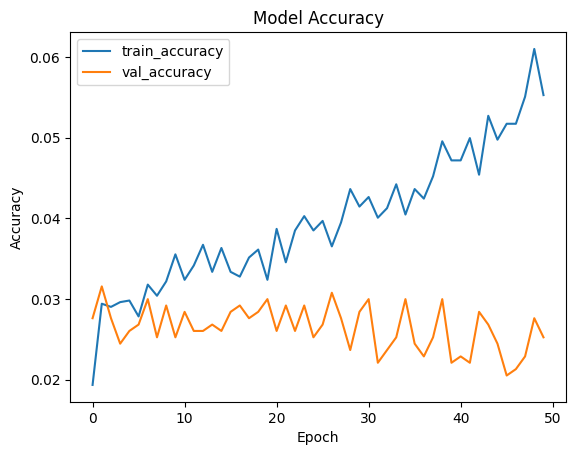

In [55]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [56]:

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [57]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Track': df['File Name'].iloc[test_idx].values,
    'Predicted BPM': label_encoder.inverse_transform(y_pred_classes)
})

In [58]:
predictions_df

,Track,Predicted BPM
0,WINNER - REALLY REALLY.mp3,123
1,Lenny - Enemy.M4a,125
2,Jazzamor - Space Cowboy.m4a,120
3,La Fouine - Du Ferme.Mp3,100
4,Chung Ha - Bad Boy.mp3,125
...,...,...
1262,Abba - Waterloo.M4a,127
1263,Stevie Wonder - Isn't She Lovely.mp3,120
1264,Jake Bugg - Saviours Of The City.m4a,171
1265,Amber Run - Haze.mp3,84


In [59]:
from tensorflow.keras.models import load_model
# Save the model
model_path = '/content/drive/MyDrive/music/lstm_bpm.h5'
model.save(model_path)
print(f'Model saved to {model_path}')

Model saved to /content/drive/MyDrive/music/lstm_bpm.h5


# Train, test, Split, Model Evaluation with Energy

In [60]:

# Split the data into training and testing sets
X_train_energy, X_test_energy, y_train_energy, y_test_energy, train_idx, test_idx = train_test_split(X, y_energy_encoded, np.arange(len(y_energy_encoded)), test_size=0.2, random_state=42)


In [61]:

# Determine number of classes
num_classes = len(np.unique(y_energy_encoded))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train_energy.shape[1], X_train_energy.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_energy, y_train_energy, epochs=50, batch_size=32, validation_data=(X_test_energy, y_test_energy))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.7581 - loss: 2.4838 - val_accuracy: 0.8603 - val_loss: 0.9233
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8621 - loss: 0.9222 - val_accuracy: 0.8603 - val_loss: 0.9131
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8606 - loss: 0.9126 - val_accuracy: 0.8603 - val_loss: 0.9081
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8541 - loss: 0.9054 - val_accuracy: 0.8603 - val_loss: 0.9107
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8561 - loss: 0.9273 - val_accuracy: 0.8603 - val_loss: 0.9195
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8606 - loss: 0.8980 - val_accuracy: 0.8603 - val_loss: 0.9065
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8543 - loss: 0.8932 - val_accuracy: 0.8603 - val_loss: 0.8994
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8633 - loss: 0.8363 - val_accuracy

In [62]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_energy, y_test_energy)
print(f'Test Accuracy: {test_acc}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8432 - loss: 1.1476
Test Accuracy: 0.8602999448776245


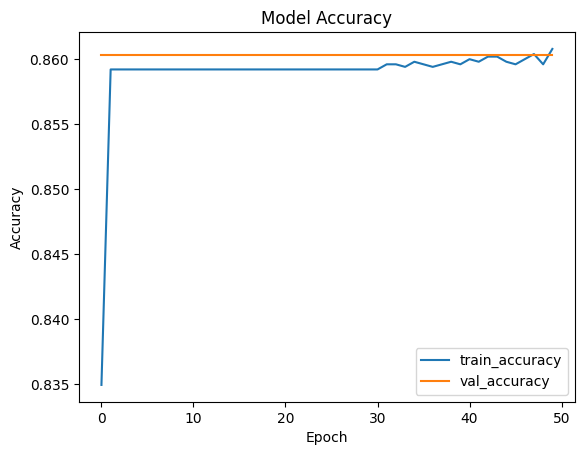

In [63]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [64]:

# Make predictions on the test set
y_pred = model.predict(X_test_energy)
y_pred_classes = np.argmax(y_pred, axis=1)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [65]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Track': df['File Name'].iloc[test_idx].values,
    'Predicted Energy': label_encoder_energy.inverse_transform(y_pred_classes)
})

In [66]:
predictions_df

,Track,Predicted Energy
0,WINNER - REALLY REALLY.mp3,0
1,Lenny - Enemy.M4a,0
2,Jazzamor - Space Cowboy.m4a,0
3,La Fouine - Du Ferme.Mp3,0
4,Chung Ha - Bad Boy.mp3,0
...,...,...
1262,Abba - Waterloo.M4a,0
1263,Stevie Wonder - Isn't She Lovely.mp3,0
1264,Jake Bugg - Saviours Of The City.m4a,0
1265,Amber Run - Haze.mp3,0


In [67]:
from tensorflow.keras.models import load_model
# Save the model
model_path = '/content/drive/MyDrive/music/lstm_energy.h5'
model.save(model_path)
print(f'Model saved to {model_path}')

Model saved to /content/drive/MyDrive/music/lstm_energy.h5


# Train, test, Split, Model Evaluation with Dance

In [68]:

# Split the data into training and testing sets
X_train_dance, X_test_dance, y_train_dance, y_test_dance, train_idx, test_idx = train_test_split(X, y_dance_encoded, np.arange(len(y_dance_encoded)), test_size=0.2, random_state=42)


In [69]:

# Determine number of classes
num_classes = len(np.unique(y_dance_encoded))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train_dance.shape[1], X_train_dance.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_dance, y_train_dance, epochs=50, batch_size=32, validation_data=(X_test_dance, y_test_dance))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.0214 - loss: 4.3690 - val_accuracy: 0.0284 - val_loss: 4.0667
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0332 - loss: 4.0508 - val_accuracy: 0.0260 - val_loss: 4.0504
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0375 - loss: 4.0144 - val_accuracy: 0.0284 - val_loss: 4.0381
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0314 - loss: 4.0143 - val_accuracy: 0.0276 - val_loss: 4.0186
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0335 - loss: 4.0048 - val_accuracy: 0.0229 - val_loss: 4.0056
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0328 - loss: 3.9822 - val_accuracy: 0.0237 - val_loss: 4.0054
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.0343 - loss: 3.9969 - val_accuracy: 0.0316 - val_loss: 3.9914
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.0341 - loss: 3.9665 - val_accuracy: 0.0284 

In [70]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_dance, y_test_dance)
print(f'Test Accuracy: {test_acc}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0290 - loss: 4.1271
Test Accuracy: 0.029202841222286224


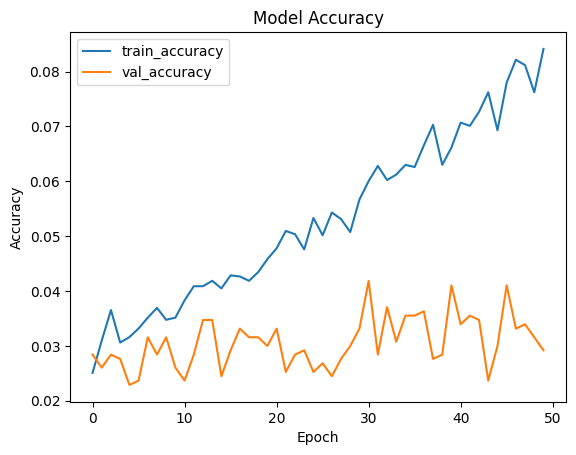

In [71]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [72]:

# Make predictions on the test set
y_pred = model.predict(X_test_dance)
y_pred_classes = np.argmax(y_pred, axis=1)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


In [73]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Track': df['File Name'].iloc[test_idx].values,
    'Predicted Dance': label_encoder_dance.inverse_transform(y_pred_classes)
})

In [74]:
predictions_df

,Track,Predicted Dance
0,WINNER - REALLY REALLY.mp3,70
1,Lenny - Enemy.M4a,70
2,Jazzamor - Space Cowboy.m4a,63
3,La Fouine - Du Ferme.Mp3,66
4,Chung Ha - Bad Boy.mp3,72
...,...,...
1262,Abba - Waterloo.M4a,51
1263,Stevie Wonder - Isn't She Lovely.mp3,63
1264,Jake Bugg - Saviours Of The City.m4a,54
1265,Amber Run - Haze.mp3,46


In [75]:
from tensorflow.keras.models import load_model
# Save the model
model_path = '/content/drive/MyDrive/music/lstm_dance.h5'
model.save(model_path)
print(f'Model saved to {model_path}')

Model saved to /content/drive/MyDrive/music/lstm_dance.h5


# Train, test, Split, Model Evaluation with Happy

In [76]:

# Split the data into training and testing sets
X_train_happy, X_test_happy, y_train_happy, y_test_happy, train_idx, test_idx = train_test_split(X, y_happy_encoded, np.arange(len(y_happy_encoded)), test_size=0.2, random_state=42)


In [77]:

# Determine number of classes
num_classes = len(np.unique(y_happy_encoded))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train_happy.shape[1], X_train_happy.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_happy, y_train_happy, epochs=50, batch_size=32, validation_data=(X_test_happy, y_test_happy))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.0143 - loss: 4.5687 - val_accuracy: 0.0110 - val_loss: 4.4838
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.0139 - loss: 4.4680 - val_accuracy: 0.0189 - val_loss: 4.4137
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0220 - loss: 4.4028 - val_accuracy: 0.0260 - val_loss: 4.3755
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0197 - loss: 4.3536 - val_accuracy: 0.0197 - val_loss: 4.3511
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0264 - loss: 4.3415 - val_accuracy: 0.0237 - val_loss: 4.3599
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0251 - loss: 4.3390 - val_accuracy: 0.0229 - val_loss: 4.3460
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0270 - loss: 4.3210 - val_accuracy: 0.0268 - val_loss: 4.3457
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.0253 - loss: 4.3103 - val_accuracy: 0.0253 

In [78]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_happy, y_test_happy)
print(f'Test Accuracy: {test_acc}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0199 - loss: 4.5385
Test Accuracy: 0.02288871258497238


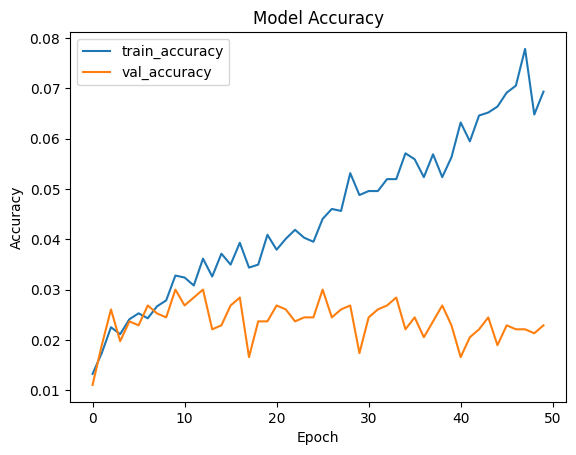

In [79]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [80]:

# Make predictions on the test set
y_pred = model.predict(X_test_happy)
y_pred_classes = np.argmax(y_pred, axis=1)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [81]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Track': df['File Name'].iloc[test_idx].values,
    'Predicted Happy': label_encoder_happy.inverse_transform(y_pred_classes)
})

In [82]:
predictions_df

,Track,Predicted Happy
0,WINNER - REALLY REALLY.mp3,46
1,Lenny - Enemy.M4a,62
2,Jazzamor - Space Cowboy.m4a,72
3,La Fouine - Du Ferme.Mp3,18
4,Chung Ha - Bad Boy.mp3,67
...,...,...
1262,Abba - Waterloo.M4a,96
1263,Stevie Wonder - Isn't She Lovely.mp3,81
1264,Jake Bugg - Saviours Of The City.m4a,28
1265,Amber Run - Haze.mp3,43


In [83]:
from tensorflow.keras.models import load_model
# Save the model
model_path = '/content/drive/MyDrive/music/lstm_happy.h5'
model.save(model_path)
print(f'Model saved to {model_path}')

Model saved to /content/drive/MyDrive/music/lstm_happy.h5


# Train, test, Split, Model Evaluation with Instrumental

In [84]:

# Split the data into training and testing sets
X_train_instrument, X_test_instrument, y_train_instrument, y_test_instrument, train_idx, test_idx = train_test_split(X, y_instrument_encoded, np.arange(len(y_instrument_encoded)), test_size=0.2, random_state=42)


In [85]:

# Determine number of classes
num_classes = len(np.unique(y_instrument_encoded))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train_instrument.shape[1], X_train_instrument.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_instrument, y_train_instrument, epochs=50, batch_size=32, validation_data=(X_test_instrument, y_test_instrument))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7867 - loss: 2.3536 - val_accuracy: 0.8603 - val_loss: 0.9239
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8583 - loss: 0.9328 - val_accuracy: 0.8603 - val_loss: 0.9176
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8560 - loss: 0.9180 - val_accuracy: 0.8603 - val_loss: 0.9219
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8611 - loss: 0.8994 - val_accuracy: 0.8603 - val_loss: 0.9115
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8521 - loss: 0.9340 - val_accuracy: 0.8603 - val_loss: 0.9127
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.8604 - loss: 0.8717 - val_accuracy: 0.8603 - val_loss: 0.9036
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8532 - loss: 0.9160 - val_accuracy: 0.8603 - val_loss: 0.9062
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8686 - loss: 0.8402 - val_accuracy: 0.8603 - 

In [86]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_instrument, y_test_instrument)
print(f'Test Accuracy: {test_acc}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8410 - loss: 1.1211
Test Accuracy: 0.8587213754653931


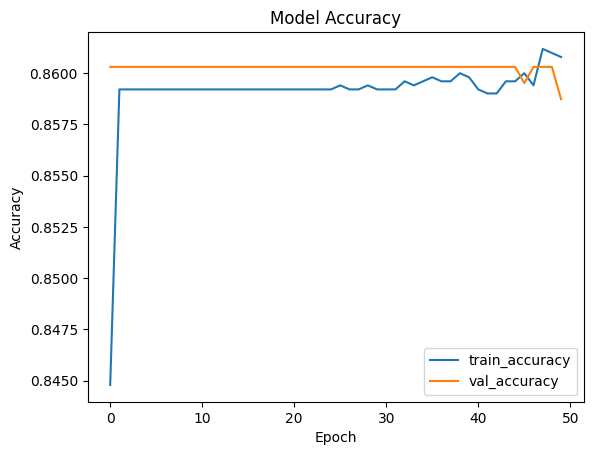

In [87]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [88]:

# Make predictions on the test set
y_pred = model.predict(X_test_instrument)
y_pred_classes = np.argmax(y_pred, axis=1)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [89]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Track': df['File Name'].iloc[test_idx].values,
    'Predicted Instrumental': label_encoder_instrument.inverse_transform(y_pred_classes)
})

In [90]:
predictions_df

,Track,Predicted Instrumental
0,WINNER - REALLY REALLY.mp3,0
1,Lenny - Enemy.M4a,0
2,Jazzamor - Space Cowboy.m4a,0
3,La Fouine - Du Ferme.Mp3,0
4,Chung Ha - Bad Boy.mp3,0
...,...,...
1262,Abba - Waterloo.M4a,0
1263,Stevie Wonder - Isn't She Lovely.mp3,0
1264,Jake Bugg - Saviours Of The City.m4a,0
1265,Amber Run - Haze.mp3,0


In [91]:
from tensorflow.keras.models import load_model
# Save the model
model_path = '/content/drive/MyDrive/music/lstm_instrument.h5'
model.save(model_path)
print(f'Model saved to {model_path}')

Model saved to /content/drive/MyDrive/music/lstm_instrument.h5


# Train, test, Split, Model Evaluation with Acoustic

In [92]:

# Split the data into training and testing sets
X_train_acoustic, X_test_acoustic, y_train_acoustic, y_test_acoustic, train_idx, test_idx = train_test_split(X, y_acoustic_encoded, np.arange(len(y_acoustic_encoded)), test_size=0.2, random_state=42)


In [93]:

# Determine number of classes
num_classes = len(np.unique(y_acoustic_encoded))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train_acoustic.shape[1], X_train_acoustic.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_acoustic, y_train_acoustic, epochs=50, batch_size=32, validation_data=(X_test_acoustic, y_test_acoustic))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.0411 - loss: 4.4805 - val_accuracy: 0.0837 - val_loss: 4.1126
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0637 - loss: 4.1406 - val_accuracy: 0.0868 - val_loss: 4.0468
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0765 - loss: 4.0307 - val_accuracy: 0.0742 - val_loss: 4.0387
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0783 - loss: 4.0078 - val_accuracy: 0.0892 - val_loss: 3.9883
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0809 - loss: 3.9897 - val_accuracy: 0.0900 - val_loss: 3.9758
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0819 - loss: 3.9621 - val_accuracy: 0.0916 - val_loss: 3.9554
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.0828 - loss: 3.9360 - val_accuracy: 0.0805 - val_loss: 3.9710
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0903 - loss: 3.9368 - val_accuracy: 0.0821 - 

In [94]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_acoustic, y_test_acoustic)
print(f'Test Accuracy: {test_acc}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0862 - loss: 4.0962
Test Accuracy: 0.08208366483449936


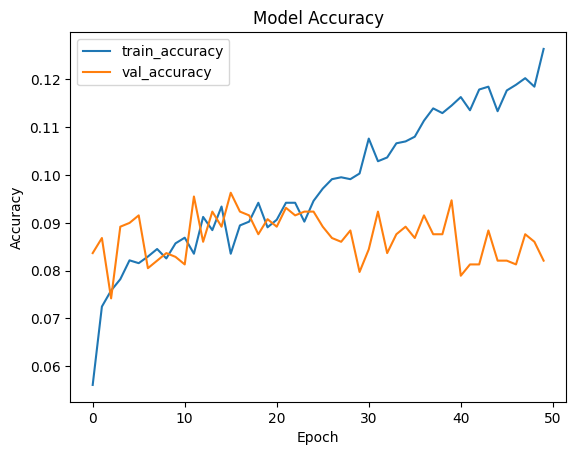

In [95]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [96]:

# Make predictions on the test set
y_pred = model.predict(X_test_acoustic)
y_pred_classes = np.argmax(y_pred, axis=1)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [97]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Track': df['File Name'].iloc[test_idx].values,
    'Predicted Acoustic': label_encoder_acoustic.inverse_transform(y_pred_classes)
})

In [98]:
predictions_df

,Track,Predicted Acoustic
0,WINNER - REALLY REALLY.mp3,1
1,Lenny - Enemy.M4a,1
2,Jazzamor - Space Cowboy.m4a,8
3,La Fouine - Du Ferme.Mp3,59
4,Chung Ha - Bad Boy.mp3,1
...,...,...
1262,Abba - Waterloo.M4a,0
1263,Stevie Wonder - Isn't She Lovely.mp3,1
1264,Jake Bugg - Saviours Of The City.m4a,86
1265,Amber Run - Haze.mp3,94


In [99]:
from tensorflow.keras.models import load_model
# Save the model
model_path = '/content/drive/MyDrive/music/lstm_acoustic.h5'
model.save(model_path)
print(f'Model saved to {model_path}')

Model saved to /content/drive/MyDrive/music/lstm_acoustic.h5


# Train, test, Split, Model Evaluation with Speech

In [100]:

# Split the data into training and testing sets
X_train_speech, X_test_speech, y_train_speech, y_test_speech, train_idx, test_idx = train_test_split(X, y_speech_encoded, np.arange(len(y_speech_encoded)), test_size=0.2, random_state=42)


In [101]:

# Determine number of classes
num_classes = len(np.unique(y_speech_encoded))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train_speech.shape[1], X_train_speech.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_speech, y_train_speech, epochs=50, batch_size=32, validation_data=(X_test_speech, y_test_speech))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.7554 - loss: 1.0705 - val_accuracy: 0.8232 - val_loss: 0.6221
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8184 - loss: 0.6253 - val_accuracy: 0.8232 - val_loss: 0.6247
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8170 - loss: 0.6248 - val_accuracy: 0.8232 - val_loss: 0.6286
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8201 - loss: 0.6212 - val_accuracy: 0.8232 - val_loss: 0.6239
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8234 - loss: 0.6175 - val_accuracy: 0.8232 - val_loss: 0.6351
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8204 - loss: 0.6138 - val_accuracy: 0.8232 - val_loss: 0.6224
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8220 - loss: 0.6066 - val_accuracy: 0.8232 - val_loss: 0.6214
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.8186 - loss: 0.6047 - val_accu

In [102]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_speech, y_test_speech)
print(f'Test Accuracy: {test_acc}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8257 - loss: 0.6582
Test Accuracy: 0.8200473785400391


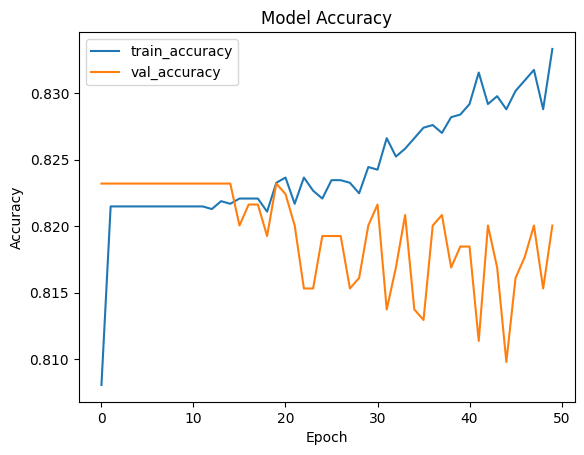

In [103]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [104]:

# Make predictions on the test set
y_pred = model.predict(X_test_speech)
y_pred_classes = np.argmax(y_pred, axis=1)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [105]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Track': df['File Name'].iloc[test_idx].values,
    'Predicted Acoustic': label_encoder_speech.inverse_transform(y_pred_classes)
})

In [106]:
predictions_df

,Track,Predicted Acoustic
0,WINNER - REALLY REALLY.mp3,0
1,Lenny - Enemy.M4a,0
2,Jazzamor - Space Cowboy.m4a,0
3,La Fouine - Du Ferme.Mp3,0
4,Chung Ha - Bad Boy.mp3,10
...,...,...
1262,Abba - Waterloo.M4a,0
1263,Stevie Wonder - Isn't She Lovely.mp3,0
1264,Jake Bugg - Saviours Of The City.m4a,0
1265,Amber Run - Haze.mp3,0


In [107]:
from tensorflow.keras.models import load_model
# Save the model
model_path = '/content/drive/MyDrive/music/lstm_speech.h5'
model.save(model_path)
print(f'Model saved to {model_path}')

Model saved to /content/drive/MyDrive/music/lstm_speech.h5


# Train, test, Split, Model Evaluation with Loud

In [108]:

# Split the data into training and testing sets
X_train_loud, X_test_loud, y_train_loud, y_test_loud, train_idx, test_idx = train_test_split(X, y_loud_encoded, np.arange(len(y_loud_encoded)), test_size=0.2, random_state=42)


In [109]:

# Determine number of classes
num_classes = len(np.unique(y_loud_encoded))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train_loud.shape[1], X_train_loud.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_loud, y_train_loud, epochs=50, batch_size=32, validation_data=(X_test_loud, y_test_loud))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.1012 - loss: 3.1933 - val_accuracy: 0.1673 - val_loss: 2.4566
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1693 - loss: 2.4823 - val_accuracy: 0.1863 - val_loss: 2.3607
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.1659 - loss: 2.4109 - val_accuracy: 0.1792 - val_loss: 2.3461
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.2014 - loss: 2.3635 - val_accuracy: 0.2005 - val_loss: 2.3334
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1828 - loss: 2.3595 - val_accuracy: 0.1942 - val_loss: 2.3446
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1911 - loss: 2.3583 - val_accuracy: 0.1965 - val_loss: 2.3109
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.2094 - loss: 2.3268 - val_accuracy: 0.2021 - val_loss: 2.3020
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1974 - loss: 2.3190 - val_accu

In [110]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_loud, y_test_loud)
print(f'Test Accuracy: {test_acc}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1997 - loss: 2.2960
Test Accuracy: 0.20205208659172058


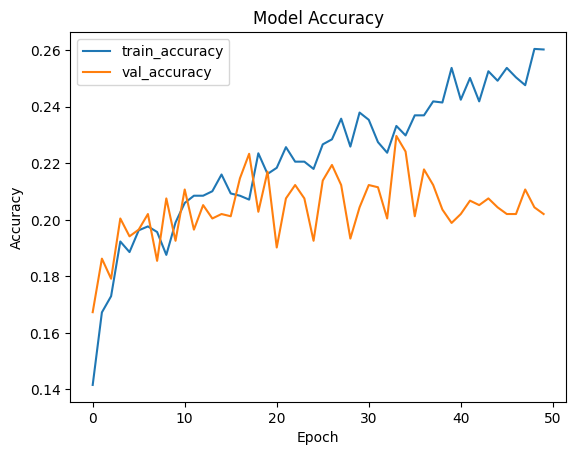

In [111]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [112]:

# Make predictions on the test set
y_pred = model.predict(X_test_loud)
y_pred_classes = np.argmax(y_pred, axis=1)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [113]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Track': df['File Name'].iloc[test_idx].values,
    'Predicted Acoustic': label_encoder_loud.inverse_transform(y_pred_classes)
})

In [114]:
predictions_df

,Track,Predicted Acoustic
0,WINNER - REALLY REALLY.mp3,-5
1,Lenny - Enemy.M4a,-4
2,Jazzamor - Space Cowboy.m4a,-7
3,La Fouine - Du Ferme.Mp3,-7
4,Chung Ha - Bad Boy.mp3,-3
...,...,...
1262,Abba - Waterloo.M4a,-3
1263,Stevie Wonder - Isn't She Lovely.mp3,-6
1264,Jake Bugg - Saviours Of The City.m4a,-7
1265,Amber Run - Haze.mp3,-13


In [115]:
from tensorflow.keras.models import load_model
# Save the model
model_path = '/content/drive/MyDrive/music/lstm_loud.h5'
model.save(model_path)
print(f'Model saved to {model_path}')

Model saved to /content/drive/MyDrive/music/lstm_loud.h5


# Train, test, Split, Model Evaluation with Live

In [116]:

# Split the data into training and testing sets
X_train_live, X_test_live, y_train_live, y_test_live, train_idx, test_idx = train_test_split(X, y_live_encoded, np.arange(len(y_live_encoded)), test_size=0.2, random_state=42)


In [117]:

# Determine number of classes
num_classes = len(np.unique(y_live_encoded))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train_live.shape[1], X_train_live.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  # Output layer for classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_live, y_train_live, epochs=50, batch_size=32, validation_data=(X_test_live, y_test_live))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.4486 - loss: 1.7193 - val_accuracy: 0.4688 - val_loss: 1.4343
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4755 - loss: 1.4356 - val_accuracy: 0.4688 - val_loss: 1.4262
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4669 - loss: 1.4372 - val_accuracy: 0.4688 - val_loss: 1.4285
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4551 - loss: 1.4510 - val_accuracy: 0.4688 - val_loss: 1.4216
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4701 - loss: 1.4090 - val_accuracy: 0.4680 - val_loss: 1.4243
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4516 - loss: 1.4469 - val_accuracy: 0.4688 - val_loss: 1.4256
Epoch 7/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4699 - loss: 1.4313 - val_accuracy: 0.4688 - val_loss: 1.4173
Epoch 8/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4628 - loss: 1.4218 - val_accu

In [118]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test_live, y_test_live)
print(f'Test Accuracy: {test_acc}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4428 - loss: 1.4521
Test Accuracy: 0.43725335597991943


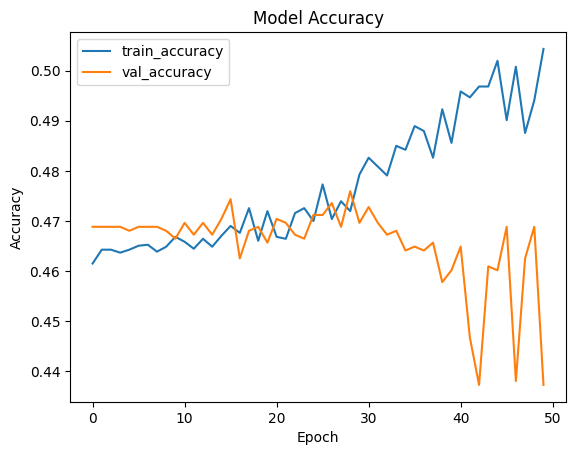

In [119]:
# Plot training and validation accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [120]:

# Make predictions on the test set
y_pred = model.predict(X_test_live)
y_pred_classes = np.argmax(y_pred, axis=1)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [129]:
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame({
    'Track': df['File Name'].iloc[test_idx].values,
    'Predicted Live': label_encoder_live.inverse_transform(y_pred_classes)
})

In [130]:
predictions_df

,Track,Predicted Live
0,Patti Drew - Suffer.M4a,10
1,Maria Augusta - If You Leave Me Now.Mp3,0
2,Nancy Wilson - Call Me.M4a,10
3,Blossom Dearie - I Won't Dance.mp3,0
4,The Thai Connection - The Red Deluxe Intro.Mp3,30
...,...,...
1262,Jimi Hendrix - Fire.m4a,10
1263,Various Artists - Purity.Mp3,10
1264,Django Reinhardt - Blue Skies.M4a,10
1265,Ward Thomas - Never Know.m4a,10


In [123]:
from tensorflow.keras.models import load_model
# Save the model
model_path = '/content/drive/MyDrive/music/lstm_live.h5'
model.save(model_path)
print(f'Model saved to {model_path}')

Model saved to /content/drive/MyDrive/music/lstm_live.h5


# Test the model with BPM

In [124]:
from tensorflow.keras.models import load_model
# Save the model
model_path = '/content/drive/MyDrive/music/lstm_BPM.h5'
model.save(model_path)
print(f'Model saved to {model_path}')

Model saved to /content/drive/MyDrive/music/lstm_BPM.h5


In [133]:
# Reload the model
model = load_model(model_path)
print(f'Model loaded from {model_path}')

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


In [126]:
import numpy as np
import pandas as pd
import librosa
from tensorflow.keras.models import load_model

# Load the trained model
lstm = load_model('/content/drive/MyDrive/music/lstm_bpm.h5')  # Adjust path as needed

# Function to extract features from an audio file
def extract_features(audio_path):
    try:
        y, sr = librosa.load(audio_path, duration=30)
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
        chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
        mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)
        return mfccs, chroma, mel
    except FileNotFoundError:
        print(f"File not found: {audio_path}")
        return None, None, None


# Load the metadata to create label encoder
df = pd.read_excel('/content/drive/MyDrive/music/AI Music Files Metadata 10k.xlsx')



In [131]:

# List of new audio files
new_audio_files = [

    # Add more file paths as needed
    '/content/drive/MyDrive/music/test_music/A.P.J. - It Takes A Man To Teach A Woman How To Love.mp3',
    '/content/drive/MyDrive/music/test_music/Albert Ammons - Oh, Lady Be Good.Mp3',
    '/content/drive/MyDrive/music/test_music/Bo Diddley - Bo Diddley.M4a',
]


# Extract features from new audio files
features_list = []
for audio_path in new_audio_files:
    mfccs, chroma, mel = extract_features(audio_path)
    if mfccs is not None and chroma is not None and mel is not None:
        mfccs = np.pad(mfccs, (0, max(0, 100 - len(mfccs))), 'constant')[:100]
        chroma = np.pad(chroma, (0, max(0, 100 - len(chroma))), 'constant')[:100]
        mel = np.pad(mel, (0, max(0, 100 - len(mel))), 'constant')[:100]
        features = np.hstack([mfccs, chroma, mel])
        features_list.append(features)



<ipython-input-126-dd82d49ba919>:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [132]:

# Convert to numpy array and reshape for LSTM
X_new = np.array(features_list).reshape((len(features_list), 1, -1))

# Make predictions
y_pred = lstm.predict(X_new)
y_pred_classes = np.argmax(y_pred, axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


In [133]:
# Map predicted labels back to genre names
predicted_genre = label_encoder.inverse_transform(y_pred_classes)

# Create a DataFrame to store predictions
predictions_df = pd.DataFrame({
    'Track': [os.path.basename(file) for file in new_audio_files],
    'Predicted BPM': predicted_genre
})

# Print predictions
predictions_df

,Track,Predicted BPM
0,A.P.J. - It Takes A Man To Teach A Woman How T...,144
1,"Albert Ammons - Oh, Lady Be Good.Mp3",90
2,Bo Diddley - Bo Diddley.M4a,144
